In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 68.4 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=aea81efbb03ad4bc33a714a3569c7115f3241d32167065440844458cc8a2e978
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.6 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=f6239f1b9ca1458b02dfd85340e72a8ee7422140b8bc65d138e8df715005072d
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=386241b3bd469d37538f0b533905e20e58dab460a92a15

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 101.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.2 MB/s eta 0:00:00


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup


In [46]:
book = "The Science and the Life of Albert Einstein ( PDFDrive )"
startdate = 1600
enddate = 2023
wikilink = "https://en.wikipedia.org/wiki/Albert_Einstein"
titlename = "Albert_Einstein"

In [47]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = rf"/content/{book}.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [48]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import yake
from rakun2 import RakunKeyphraseDetector


def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords



In [49]:
dir_path = rf"/content/{book}/part"
rootdir = rf"/content/{book}/"
part = 1
mp_bert, mp_yake, mp_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter_'+ str(i)                
                content = content_file.read()
                print(key)
                mp_bert[key] = get_keyword_bert(content)
                mp_yake[key] = get_keyword_yake(content)
                mp_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

28
1/chapter_1
1/chapter_2
1/chapter_3
1/chapter_4
1/chapter_5
1/chapter_6
1/chapter_7
1/chapter_8
1/chapter_9
1/chapter_10
1/chapter_11
1/chapter_12
1/chapter_13
1/chapter_14
1/chapter_15
1/chapter_16
1/chapter_17
1/chapter_18
1/chapter_19
1/chapter_20
1/chapter_21
1/chapter_22
1/chapter_23
1/chapter_24
1/chapter_25
1/chapter_26
1/chapter_27
1/chapter_28


In [50]:
mp_bert

{'1/chapter_1': [('physicist einstein', 0.4737),
  ('einstein', 0.431),
  ('century physicist', 0.4299),
  ('detail einstein', 0.4222),
  ('midlife einstein', 0.4222)],
 '1/chapter_2': [('planck', 0.4713),
  ('wig planck', 0.4505),
  ('quantum physics', 0.441),
  ('quantum theory', 0.4376),
  ('theoretical physics', 0.4198)],
 '1/chapter_3': [('hermann einstein', 0.5637),
  ('einstein biographies', 0.5394),
  ('einstein family', 0.5171),
  ('einstein', 0.497),
  ('einsteins', 0.4951)],
 '1/chapter_4': [('abhandlungen von ludwig boltzmann', 0.5305),
  ('einstein articles', 0.5189),
  ('ludwig boltzmann', 0.5006),
  ('statistical physics', 0.4655),
  ('in72 statistical physics', 0.4635)],
 '1/chapter_5': [('atoms', 0.589),
  ('atom', 0.5741),
  ('atomes', 0.5502),
  ('atomicity', 0.5064),
  ('chemical philosophy', 0.4926)],
 '1/chapter_6': [('morley experiments', 0.6134),
  ('morley experiment', 0.5715),
  ('morley', 0.5543),
  ('maxwell', 0.541),
  ('morley result', 0.5071)],
 '1/chapte

In [51]:
with open(rf"mp_{book}_bert.json", "w") as outfile:
    json.dump(mp_bert, outfile)

with open(rf"mp_{book}_yake.json", "w") as outfile:
    json.dump(mp_yake, outfile)

with open(rf"mp_{book}_rakun.json", "w") as outfile:
    json.dump(mp_rakun, outfile)

In [52]:
mp_combined = {}
for k in mp_rakun.keys():
  k1 = set([v[0] for v in mp_bert[k]])
  k2 = set([v[0] for v in mp_yake[k]])
  k3 = set([v[0] for v in mp_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

# mp_combined
for k,v in mp_combined.items():
  print(len(v))

14
14
15
13
15
15
15
13
13
15
14
15
14
15
15
15
14
13
14
15
14
15
14
15
13
12
15
15


In [53]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'grossmann collaboration', 'Unified Field Theory', 'York Times', 'proceedings einstein centennial symposium', 'BKS Proposal', 'paper einstein', 'radiation quantum', 'Michelson', 'BKS', 'Albert Einstein', 'einstein essays', 'einstein letters', 'Herr Professor Einstein', 'refreshing as ever.', 'Gravitation', 'direction', 'general relativity', 'telegram', 'York', 'Brownian motion paper', 'unimodular transformations', 'inertial frame', 'einstein appointment', 'Lorentz', 'herr dr einstein', 'Quantum Theory', 'einstein theory', 'circumstances einstein', 'law', 'electromagnetic radiation', 'gravitational potential', 'quantum statistics', 'Einstein Nobel prize', 'QUANTUM THEORY', 'Boltzmann', 'bks proposal', 'Brownian motion', 'herr professor einstein', 'Wave Mechanics', 'concentrated exclusively', 'atomicity', 'einstein polemic', 'Wave', 'Specific Heats', 'suspended particles', 'einstein papers', 'wig planck', 'einstein articles', 'einstein', 'matter wave mechanics', 'Planck radiation theory

In [54]:
def get_year_to_content():
    dir_path = rf"/content/{book}/part"
    rootdir =rf"/content/{book}/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) <= enddate and int(date) >= startdate:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter_{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Einstein_1905': ['1/chapter_1', '1/chapter_2', '1/chapter_4', '1/chapter_5', '1/chapter_6', '1/chapter_7', '1/chapter_8', '1/chapter_18', '1/chapter_19'], 'Einstein_1901': ['1/chapter_3'], 'Einstein_1907': ['1/chapter_9'], 'Einstein_1909': ['1/chapter_10', '1/chapter_21'], 'Einstein_1911': ['1/chapter_11'], 'Einstein_1912': ['1/chapter_12'], 'Einstein_1913': ['1/chapter_13'], 'Einstein_1915': ['1/chapter_14'], 'Einstein_1916': ['1/chapter_15'], 'Einstein_1919': ['1/chapter_16'], 'Einstein_1929': ['1/chapter_17'], 'Einstein_1906': ['1/chapter_20'], 'Einstein_1924': ['1/chapter_22', '1/chapter_23'], 'Einstein_1923': ['1/chapter_24'], 'Einstein_1926': ['1/chapter_25'], 'Einstein_1949': ['1/chapter_26'], 'Einstein_1955': ['1/chapter_27'], 'Einstein_1922': ['1/chapter_28'], 'Midlife_Einstein_1905': ['1/chapter_1'], 'Light_Quantum_1905': ['1/chapter_1', '1/chapter_4', '1/chapter_18', '1/chapter_19'], 'Light_Quantum_1901': ['1/chapter_3'], 'Light_Quantum_1909': [

In [55]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [56]:
key_yr_chap_mp

defaultdict(list,
            {'Einstein_1905': ['1/chapter_1',
              '1/chapter_2',
              '1/chapter_4',
              '1/chapter_5',
              '1/chapter_6',
              '1/chapter_7',
              '1/chapter_8',
              '1/chapter_18',
              '1/chapter_19'],
             'Einstein_1901': ['1/chapter_3'],
             'Einstein_1907': ['1/chapter_9'],
             'Einstein_1909': ['1/chapter_10', '1/chapter_21'],
             'Einstein_1911': ['1/chapter_11'],
             'Einstein_1912': ['1/chapter_12'],
             'Einstein_1913': ['1/chapter_13'],
             'Einstein_1915': ['1/chapter_14'],
             'Einstein_1916': ['1/chapter_15'],
             'Einstein_1919': ['1/chapter_16'],
             'Einstein_1929': ['1/chapter_17'],
             'Einstein_1906': ['1/chapter_20'],
             'Einstein_1924': ['1/chapter_22', '1/chapter_23'],
             'Einstein_1923': ['1/chapter_24'],
             'Einstein_1926': ['1/chapter_25'],

In [57]:
def split_sentence_from_text(key):
    file_loc = rf"/content/{book}/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Einstein_1905
Einstein_1901
Einstein_1907
Einstein_1909
Einstein_1911
Einstein_1912
Einstein_1913
Einstein_1915
Einstein_1916
Einstein_1919
Einstein_1929
Einstein_1906
Einstein_1924
Einstein_1923
Einstein_1926
Einstein_1949
Einstein_1955
Einstein_1922
Midlife_Einstein_1905
Light_Quantum_1905
Light_Quantum_1901
Light_Quantum_1909
Quantum_Theory_1924
Century_Physicist_1905
Special_Relativity_1905
Quantum_1905
Quantum_Mechanics_1905
Quantum_Mechanics_1926
Quantum_Mechanics_1949
Theory_1911
Field_Theory_1929
Mighty_And_Sublime_1905
Detail_Einstein_1905
Physicist_Einstein_1905
Relativity_Theory_1905
Relativity_Theory_1907
Relativity_Theory_1909
Relativity_Theory_1911
Relativity_Theory_1915
Relativity_Theory_1919
Relativity_Theory_1922
Planck_1905
Blackbody_Radiation_1905
Blackbody_Radiation_1909
Theoretical_Physics_1905
Theoretical_Physics_1922
Hypothetical_Constituents_1905
Wig_Planck_1905
Quantum_Physics_1905
Quantum_Physics_1949
Private_Communication_1901
Einsteins_1901
Einsteins_1915
Ei

In [58]:
with open(rf"mp_key_doc_{book}.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [59]:
url = wikilink
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Life_and_career', 'Early_life_and_education', 'Marriages_and_children', 'Patent_office', 'First_scientific_papers', 'Academic_career', '1921–1922:_Travels_abroad', '1925:_Visit_to_South_America', '1930–1931:_Travel_to_the_US', '1933:_Emigration_to_the_US', 'Refugee_status', 'Resident_scholar_at_the_Institute_for_Advanced_Study', 'World_War_II_and_the_Manhattan_Project', 'US_citizenship', 'Personal_views', 'Political_views', 'Relationship_with_Zionism', 'Religious_and_philosophical_views', 'Love_of_music', 'Death', 'Scientific_career', '1905_–_Annus_Mirabilis_papers', 'Statistical_mechanics', 'Thermodynamic_fluctuations_and_statistical_physics', 'Theory_of_critical_opalescence', 'Special_relativity', 'General_relativity', 'General_relativity_and_the_equivalence_principle', 'Gravitational_waves', 'Hole_argument_and_Entwurf_theory', 'Physical_cosmology', 'Energy_momentum_pseudotensor', 'Wormholes', 'Einstein–Cartan_theory', 'Equations_of_motion', 'Old_quantum_theory', 'Photons_and_energ

In [60]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' and val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            # print(f"{key1} {key2} {cos_scores}")

In [61]:
mp_sim_score

{'Early_life_and_education->Einstein_1905': tensor(0.3923, device='cuda:0'),
 'Early_life_and_education->Einstein_1901': tensor(0.5617, device='cuda:0'),
 'Early_life_and_education->Einstein_1907': tensor(0.2784, device='cuda:0'),
 'Early_life_and_education->Einstein_1909': tensor(0.5003, device='cuda:0'),
 'Early_life_and_education->Einstein_1911': tensor(0.5154, device='cuda:0'),
 'Early_life_and_education->Einstein_1912': tensor(0.5149, device='cuda:0'),
 'Early_life_and_education->Einstein_1913': tensor(0.4174, device='cuda:0'),
 'Early_life_and_education->Einstein_1915': tensor(0.5450, device='cuda:0'),
 'Early_life_and_education->Einstein_1916': tensor(0.3575, device='cuda:0'),
 'Early_life_and_education->Einstein_1919': tensor(0.4795, device='cuda:0'),
 'Early_life_and_education->Einstein_1929': tensor(0.4537, device='cuda:0'),
 'Early_life_and_education->Einstein_1906': tensor(0.4264, device='cuda:0'),
 'Early_life_and_education->Einstein_1924': tensor(0.3228, device='cuda:0'),

In [62]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open(rf"mp_sim_score_{book}.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [63]:
import json
with open(f"mp_sim_score_{book}.json") as outfile:
    mp_sim_score = json.load(outfile)

In [64]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    # plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [65]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<0"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


# display_bar_plot(mp_sim_score_bar_range,rf"similarity distribution for {book}","similarity","count")

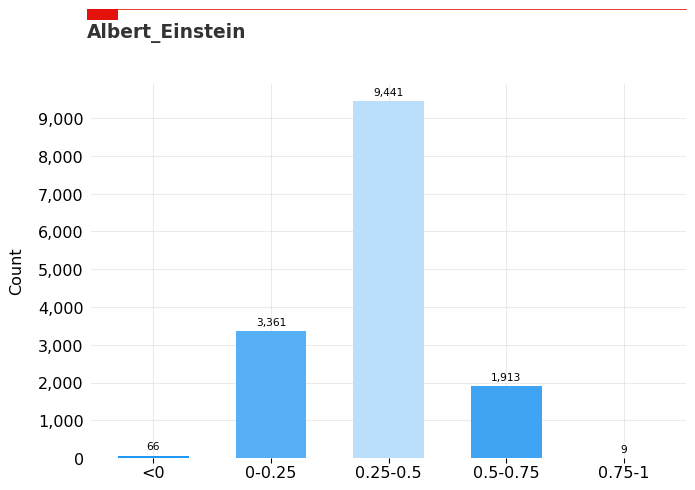

In [66]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# Create the figure and axes objects, specify the size and the dots per inches
# delay_by_month['Month'], delay_by_month['ArrDelay'] ->  
# list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values())

fig, ax = plt.subplots(figsize=(8,6), dpi = 96)

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()),width=0.6)
# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
labels = list(mp_sim_score_bar_range.keys())
ax.set_xticks(list(mp_sim_score_bar_range.keys()), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in list(mp_sim_score_bar_range.values())], padding=3, color='black', fontsize=8) 

# Remove the spines
ax.spines[['top','left','right','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s=titlename, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
# ax.text(x=0.12, y=.90, s="between Wikipedia section content and Keyword focused paragraph", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
# ax.text(x=0.1, y=0.12, s="Mahatma Gandhi", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(min(list(mp_sim_score_bar_range.values())), max(list(mp_sim_score_bar_range.values()))) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()), color=cmap(norm(list(mp_sim_score_bar_range.values()))), width=0.6, zorder=2)
fig.savefig(f"similarity_distribution_{book}.png")

In [67]:
from statistics import median
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) <= enddate and int(date) >= startdate:                    
                #print date
                year_list.append(int(date))
    except:
        pass
    if year_list:
        # res = max(set(year_list), key=year_list.count)
        res = median(year_list)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
print(wiki_section_date)

{'Life_and_career': -1, 'Early_life_and_education': 1895, 'Marriages_and_children': 1919, 'Patent_office': 1901, 'First_scientific_papers': 1905, 'Academic_career': 1915, '1921–1922:_Travels_abroad': 1922, '1925:_Visit_to_South_America': 1925, '1930–1931:_Travel_to_the_US': 1930, '1933:_Emigration_to_the_US': 1933, 'Refugee_status': 1933, 'Resident_scholar_at_the_Institute_for_Advanced_Study': 1934, 'World_War_II_and_the_Manhattan_Project': 1946, 'US_citizenship': 1946, 'Personal_views': -1, 'Political_views': 1927, 'Relationship_with_Zionism': 1936, 'Religious_and_philosophical_views': 1954, 'Love_of_music': 1934, 'Death': 1955, 'Scientific_career': 1957, '1905_–_Annus_Mirabilis_papers': 1905, 'Statistical_mechanics': -1, 'Thermodynamic_fluctuations_and_statistical_physics': 1903, 'Theory_of_critical_opalescence': -1, 'Special_relativity': 1906, 'General_relativity': -1, 'General_relativity_and_the_equivalence_principle': 1907, 'Gravitational_waves': 1970, 'Hole_argument_and_Entwurf_t

In [68]:
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = enddate-startdate
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
        rank = 0.5*date_score + 0.5*sim_score
        mixed_sim_score[key] = rank

## Keyword Filteration 1

In [69]:
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))

final_kw = set()

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    final_kw.add(ele[0])
# print(final_kw)
print(len(final_kw))

# initialization
kw_max_score = {}
for k in final_kw:
  kw_max_score[k] = 0

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    kw_max_score[ele[0]] = max(kw_max_score[ele[0]], ele[1])
# print(kw_max_score)


277


In [70]:
for k,v in section_wise_keyword_filtered.items():
  print(f"{k}   ->  {len(v)}")

Early_life_and_education   ->  171
Marriages_and_children   ->  215
Patent_office   ->  247
First_scientific_papers   ->  260
Academic_career   ->  254
1921–1922:_Travels_abroad   ->  190
1925:_Visit_to_South_America   ->  180
1930–1931:_Travel_to_the_US   ->  153
1933:_Emigration_to_the_US   ->  154
Refugee_status   ->  213
Resident_scholar_at_the_Institute_for_Advanced_Study   ->  199
World_War_II_and_the_Manhattan_Project   ->  165
US_citizenship   ->  149
Political_views   ->  181
Relationship_with_Zionism   ->  138
Religious_and_philosophical_views   ->  78
Love_of_music   ->  153
Death   ->  190
Scientific_career   ->  230
1905_–_Annus_Mirabilis_papers   ->  228
Thermodynamic_fluctuations_and_statistical_physics   ->  241
Theory_of_critical_opalescence   ->  95
Special_relativity   ->  250
General_relativity_and_the_equivalence_principle   ->  173
Gravitational_waves   ->  190
Hole_argument_and_Entwurf_theory   ->  230
Physical_cosmology   ->  231
Energy_momentum_pseudotensor   -

In [71]:
mp_final_kw = collections.defaultdict(list)
for k,v in section_wise_keyword_filtered.items():
  mp = {}
  for ele in v:
    mp[ele[0]] = ele[1]
  for ele in v:
    if mp[ele[0]] == kw_max_score[ele[0]]:
      mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in mp_final_kw.items():
#   mp1[k] = len(v)
#   # print(f"{k}   ->  {len(v)}")

# print(mp1)

In [72]:
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in mp_final_kw.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")
mp1 = {}
for k,v in section_wise_keyword_sort_only.items():
  mp1[k] = len(v)
  # print(f"{k}   ->  {len(v)}")

print(mp1)

Early_life_and_education  ->   ['Power_Stations_1901']
Marriages_and_children  ->   ['Suddenly_Famous_1919']
Patent_office  ->   ['Patent_Office_1901', 'Einstein_1901', 'Einsteins_1901', 'Einstein_Biographies_1901', 'Reproductions_Of_Rare_1901']
First_scientific_papers  ->   ['Physicist_1905', 'Brownian_Motion_Paper_1905', 'Midlife_Einstein_1905', 'Einstein_Articles_1905', 'Discussed_1905']
Academic_career  ->   ['Relativity_Theory_1915', 'Einstein_1915', 'Einsteins_1915', 'Einstein_Archive_1915', 'Einstein_Symposium_Jerusalem_1915']
1921–1922:_Travels_abroad  ->   ['Einstein_Nobel_Prize_1922', 'Einstein_Dialogue_1922', 'Hours_Einstein_1922', 'Professor_Einstein_1922', 'Einstein_1922']
1925:_Visit_to_South_America  ->   ['Einstein_Papers_1924', 'Law_1924', 'Einstein_1924', 'Bohr_1924', 'Einstein_Deviate_1924']
1930–1931:_Travel_to_the_US  ->   ['New_Einstein_Theory_1929', 'Einstein_1929']
1933:_Emigration_to_the_US  ->   ['Permission_To_Revert_1919']
Refugee_status  ->   ['Occasion_195

In [73]:
# top_mp_final_kw = collections.defaultdict(list)
# for k,v in mp_final_kw.items():
#   for ele in v:
#     if ele[1]>0.50:
#       print(ele)
#       top_mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in top_mp_final_kw.items():
#   mp1[k] = len(v)

# print(mp1)

In [74]:
# for k,v in section_wise_keyword_filtered.items():
#   mp = {}
#   for ele in v:
#     mp[ele[0]] = ele[1]

#   for ele in v:
#     if mp[ele[0]]  != kw_max_score[ele[0]]:
#       section_wise_keyword_filtered[k].remove(ele)

# for k,v in section_wise_keyword_filtered.items():
#   print(f"{k}   ->  {len(v)}")

In [75]:
with open(rf"filtered_kw_{book}.json", "w") as outfile:
    json.dump(mp_final_kw, outfile)

In [76]:
def kw_2_nrml(s1):
  temp = s1[:s1.rindex('_')]
  a = temp.split('_')
  # for i,v in enumerate(a):
  #     a[i] = v.lower()
      
  val = " ".join(a)
  return val
  
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

temp = []
multitimekws = []
for k in final_kw:
  temp.append(kw_2_nrml(k))

mp = collections.Counter(temp)
for k,v in mp.items():
  if v>1:
    multitimekws.append(k)

print(multitimekws)
print(len(multitimekws))

section_to_num = {}  # this dict will store num of keywords which are present in keywords as a simple text
for k,v in section_wise_keyword_sort.items():
  cnt = set()
  for ele in v:
    temp = kw_2_nrml(ele[0])
    if find_freq(temp,id_to_paragraph[k])>0: #and temp not in multitimekws:
      cnt.add(temp)
  section_to_num[k] = cnt

mp2 = {}
for k,v in section_to_num.items():
  mp2[k] = len(v)

print(mp2)

['Relativity Theory', 'Field Equations', 'Physicists', 'Einstein', 'Relativity', 'Theoretical Physics', 'Quantum Physics', 'Radiation Theory', 'Nineteenth Century', 'Gravitational Field', 'Einsteins', 'Patent Office', 'Albert Einstein', 'Einstein Wrote', 'Law', 'Equivalence Principle', 'Quantum Field Theory', 'Physicist', 'Quantum Mechanics', 'Electromagnetic Field', 'Blackbody Radiation', 'Light Quantum', 'General Theory', 'Gravitational Equations']
24
{'Early_life_and_education': 0, 'Marriages_and_children': 0, 'Patent_office': 2, 'First_scientific_papers': 0, 'Academic_career': 1, '1921–1922:_Travels_abroad': 1, '1925:_Visit_to_South_America': 1, '1930–1931:_Travel_to_the_US': 1, '1933:_Emigration_to_the_US': 0, 'Refugee_status': 0, 'Death': 1, '1905_–_Annus_Mirabilis_papers': 2, 'Thermodynamic_fluctuations_and_statistical_physics': 0, 'Special_relativity': 1, 'General_relativity_and_the_equivalence_principle': 2, 'Hole_argument_and_Entwurf_theory': 1, 'Physical_cosmology': 0, 'Ener

In [77]:
print(sum(list(mp2.values())))

20


In [78]:
def FetchURLSBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())
    linkToScrape = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
#             my_lst.append(tag.get_text())
            allLinks = tag.find_all('a')
            
            for link in allLinks:
                if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
                    linkToScrape.append(link['href'].replace('/wiki/',""))
        if tag == endElem:
            inBetween = False
            break
    return set(linkToScrape)

mp_urls_section_mp  = {}
for i in range(len(desired_ids)-1):
    mp_urls_section_mp[desired_ids[i]] = FetchURLSBetweenIds(desired_ids[i],desired_ids[i+1])

# print(mp_urls_section_mp)

sec_2_common_link = {}
for k,v in section_wise_keyword_sort.items():
  couldbelinks = set()
  for ele in v:
    s1 = ele[0]
    couldbelinks.add(s1[:s1.rindex('_')])
  sec_2_common_link[k] = mp_urls_section_mp[k].intersection(couldbelinks)

print(sec_2_common_link)
# print(sum(list(sec_2_common_link.values())))
mp3 = {}
for k,v in sec_2_common_link.items():
  mp3[k] = len(v)

print(mp3)
print(sum(list(mp3.values())))

{'Early_life_and_education': set(), 'Marriages_and_children': set(), 'Patent_office': set(), 'First_scientific_papers': set(), 'Academic_career': set(), '1921–1922:_Travels_abroad': set(), '1925:_Visit_to_South_America': set(), '1930–1931:_Travel_to_the_US': set(), '1933:_Emigration_to_the_US': set(), 'Refugee_status': set(), 'Death': set(), '1905_–_Annus_Mirabilis_papers': set(), 'Thermodynamic_fluctuations_and_statistical_physics': set(), 'Special_relativity': set(), 'General_relativity_and_the_equivalence_principle': set(), 'Hole_argument_and_Entwurf_theory': set(), 'Physical_cosmology': set(), 'Energy_momentum_pseudotensor': set(), 'Photons_and_energy_quanta': set(), 'Quantized_atomic_vibrations': set(), 'Bose–Einstein_statistics': set(), 'Wave–particle_duality': set(), 'Zero-point_energy': set(), 'Stimulated_emission': set(), 'Matter_waves': set(), "Einstein's_objections_to_quantum_mechanics": set(), 'Unified_field_theory': set(), 'In_popular_culture': set()}
{'Early_life_and_educ

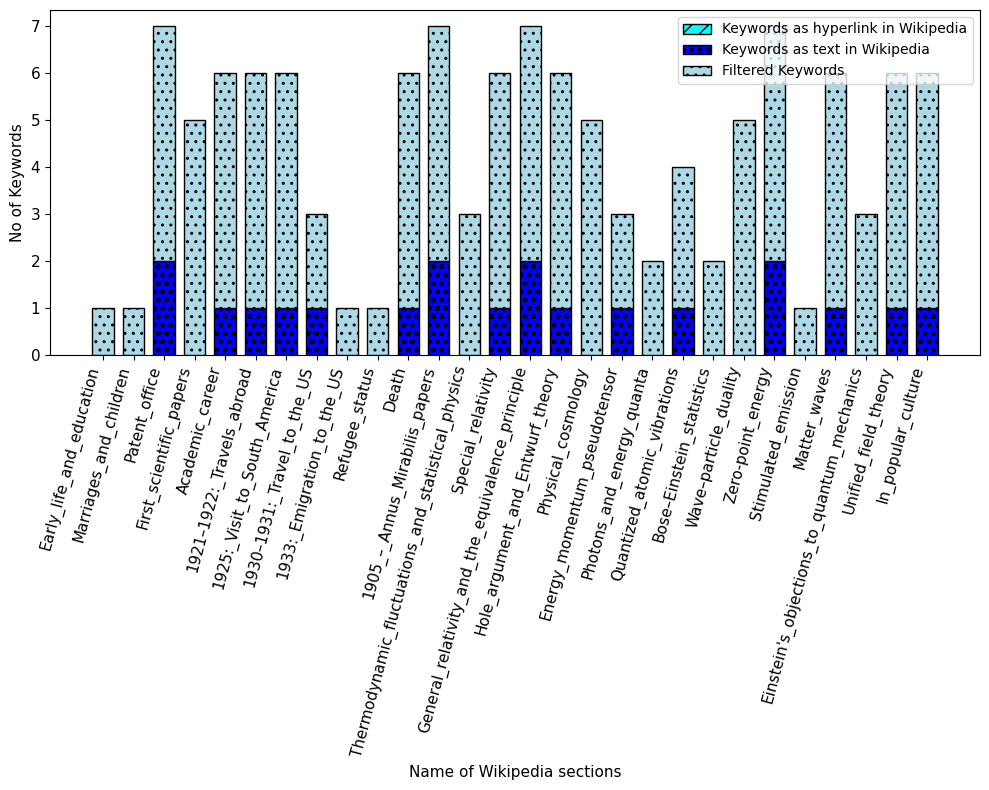

In [79]:
#Plot has been done for the tag has greater than 1 value
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 8))

x = list(mp3.keys())
y1 = list(mp3.values())
y2 = list(mp2.values())
y3 = list(mp1.values())

plt.bar(x, y1, width=0.7, color ='#00FFFF', hatch= "//", edgecolor = "black")
plt.bar(x, y2, bottom=y1, width=0.7, color ='blue', hatch= "oo", edgecolor = "black")
plt.bar(x, y3, bottom=y2, width=0.7, color ='lightblue', hatch= "..", edgecolor = "black")

plt.xlabel("Name of Wikipedia sections", fontsize=11, y= -0.1)
#plt.ylabel("Ratio of the duplicate question\n to the all question associated\n with the particular tag", fontsize=14)
plt.ylabel("No of Keywords", fontsize=11)
#plt.title("Students enrolled in different courses")
plt.xticks(rotation=75, fontsize=11, ha="right")
plt.yticks(fontsize=11)
plt.legend(["Keywords as hyperlink in Wikipedia", "Keywords as text in Wikipedia", "Filtered Keywords"])

#plt.show()
plt.tight_layout()
plt.savefig(f"kw_dist_wiki_sec_{book}.png")

# Wikipedia Page Creation
I am targeting the keywords which are present in wikipedia as a text but no hyperlinks are present and timed keywords that are present in different wikipedia section but in different year

In [80]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Gravitational', 'Zurich_Einstein', 'Conservation_Laws', 'Radiation_Theory', 'Gravitation', 'Colloquium_Einstein', 'Osmotic_Pressure', 'Morley_Experiment', 'Unified_Field', 'Einstein_Biographies', 'Specific_Heat', 'York_Times', 'Midlife_Einstein', 'Gravitational_Potential', 'Quantum_Statistics', 'Brownian_Motion_Paper', 'Equipartition_Theorem', 'Temperature_Experiments', 'Famous_Doctor_Einstein', 'Brownian', 'Occasion', 'Quantum_Physicists', 'Hypothetical_Constituents', 'Discussed', 'Permission_To_Revert', 'Relativity_Paper', 'Virtual_Field', 'Law', 'Aethers', 'Circumstances_Einstein', 'Albert_Einstein', 'Saturday_Einstein', 'Grained_Counting', 'Power_Stations', 'Einstein_Articles', 'Einstein_Specific_Heat', 'Specific_Heats', 'Einstein_Symposium_Jerusalem', 'Einstein_Polemic', 'Gravitational_Field', 'Electromagnetic_Field', 'Relativity', 'Einstein_Papers', 'Bohr', 'Radiation_Quantum', 'Moment_Of_Inertia', 'Quantum_Field_Theory', 'Einstein_Deviate', 'Reproductions_Of_Rare', 'Field_Theo

In [81]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)
     

2096
{'Special:BookSources/978-0-679-77631-4', 'Paul_Dirac', 'Polykarp_Kusch', 'Category:20th-century_American_physicists', 'Inductionism', 'Category:Articles_with_BNF_identifiers', 'President_of_Israel', 'File:19191125_A_New_Physics_Based_on_Einstein_-_The_New_York_Times.png', 'Horst_Ludwig_St%C3%B6rmer', 'Andre_Geim', 'Boson', 'Template:1917_Nobel_Prize_winners', 'The_Beatles', 'Louis_B._Mayer', 'Category:All_Wikipedia_articles_written_in_American_English', 'Mount_Einstein', 'Special:BookSources/978-3-944913-56-8', 'Mozart_violin_sonatas', 'Sheldon_Glashow', 'Picasso_at_the_Lapin_Agile', 'Walther_Bothe', 'George_E._Smith', 'Ernst_Mach', 'Nobel_Prize_in_Literature', 'Gerd_Binnig', 'Point_particle', 'Princeton_University', 'Fellow_of_the_Royal_Society', 'Life_(magazine)', 'Einstein_notation', 'Eric_Allin_Cornell', 'Category:Articles_with_FAST_identifiers', 'Olsberg,_Aargau', 'Category:Articles_with_LCCN_identifiers', 'PMID_(identifier)', 'Lawrence_Bragg', 'Office_of_Scientific_and_Tech

In [82]:
hyperlinks_present = final_keywords & set(urls)
print(hyperlinks_present)
len(hyperlinks_present)

{'Gravitation'}


1

In [83]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Suddenly_Famous_1919', 'Hours_Einstein_1922', 'Professor_Einstein_1922', 'Einstein_Nobel_Prize_1922', 'Relativity_Paper_1907', 'Specific_Heat_1906', 'Einstein_Deviate_1924', 'Virtual_Field_1924', 'Aethers_1905', 'Grossmann_Gravitation_Equations_1913', 'Relativity_Quantum_Theory_1949', 'Einstein_1901', 'Relativity_1907', 'Relativity_1916', 'Gravitation_1913', 'Einstein_Essays_1919', 'Quantum_Physics_1949', 'Radiation_Theory_1909', 'Midlife_Einstein_1905', 'York_Times_1955', 'Quantum_Physicists_1909', 'Moment_Of_Inertia_1906', 'Gravitational_Field_1907', 'Radiation_Quantum_1909', 'Einsteins_1926', 'Einstein_1913', 'Einstein_Symposium_Jerusalem_1915', 'New_Einstein_Theory_1929', 'Patent_Office_1901', 'Thermal_Equilibrium_1906', 'Albert_Einstein_1955', 'Einstein_Dialogue_1922', 'Famous_Doctor_Einstein_1919', 'Einstein_1922', 'Bohr_1924', 'Einstein_1949', 'Hypothetical_Constituents_1905', 'Einstein_1929', 'Law_1924', 'Einstein_1915', 'Saturday_Einstein_1955', 'Quantum_Field_Theory_1949', 

In [84]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Einstein_1901': ['1/chapter_3'], 'Einstein_1911': ['1/chapter_11'], 'Einstein_1913': ['1/chapter_13'], 'Einstein_1915': ['1/chapter_14'], 'Einstein_1919': ['1/chapter_16'], 'Einstein_1929': ['1/chapter_17'], 'Einstein_1906': ['1/chapter_20'], 'Einstein_1924': ['1/chapter_22', '1/chapter_23'], 'Einstein_1926': ['1/chapter_25'], 'Einstein_1949': ['1/chapter_26'], 'Einstein_1955': ['1/chapter_27'], 'Einstein_1922': ['1/chapter_28'], 'Midlife_Einstein_1905': ['1/chapter_1'], 'Quantum_Mechanics_1926': ['1/chapter_25'], 'Quantum_Mechanics_1949': ['1/chapter_26'], 'Theory_1911': ['1/chapter_11'], 'Field_Theory_1929': ['1/chapter_17'], 'Relativity_Theory_1915': ['1/chapter_14'], 'Relativity_Theory_1919': ['1/chapter_16'], 'Hypothetical_Constituents_1905': ['1/chapter_2'], 'Quantum_Physics_1949': ['1/chapter_26'], 'Einsteins_1901': ['1/chapter_3'], 'Einsteins_1915': ['1/chapter_14'], 'Einsteins_1926': ['1/chapter_25'], 'Power_Stations_1901': ['1/chapter_3'], 'Einstein_Biographies_1901': ['1/c

In [85]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['suddenly famous', 'hours einstein', 'professor einstein', 'einstein nobel prize', 'relativity paper', 'specific heat', 'einstein deviate', 'virtual field', 'aethers', 'grossmann gravitation equations', 'relativity quantum theory', 'einstein', 'relativity', 'relativity', 'gravitation', 'einstein essays', 'quantum physics', 'radiation theory', 'midlife einstein', 'york times', 'quantum physicists', 'moment of inertia', 'gravitational field', 'radiation quantum', 'einsteins', 'einstein', 'einstein symposium jerusalem', 'new einstein theory', 'patent office', 'thermal equilibrium', 'albert einstein', 'einstein dialogue', 'famous doctor einstein', 'einstein', 'bohr', 'einstein', 'hypothetical constituents', 'einstein', 'law', 'einstein', 'saturday einstein', 'quantum field theory', 'einstein biographies', 'unveil einstein', 'einstein', 'einstein polemic', 'zurich einstein', 'afternoon einstein', 'brownian motion paper', 'einstein specific heat', 'theory', 'gravitational', 'gravitational f

In [86]:
import re
para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

27
102
0.2647058823529412
